In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)  

In [3]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

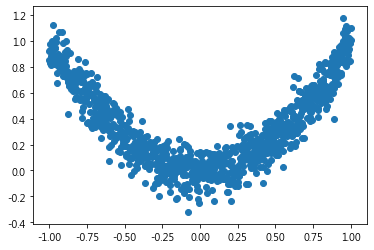

In [4]:
# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [5]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

In [6]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [7]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [8]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [9]:

loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss

In [10]:

# training
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):          # for each training step
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.item())     # loss recoder

            
            

    


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


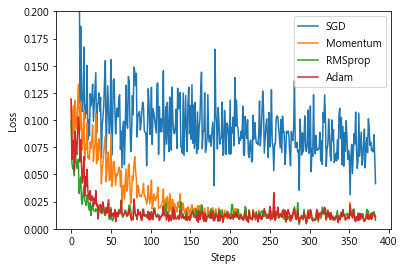

In [14]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):

    plt.plot(l_his, label=labels[i])
    

plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

0
1
2
3


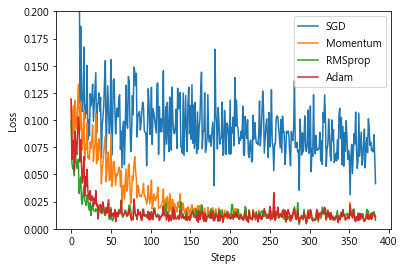

In [23]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    print(i)
    plt.plot(l_his, label=labels[i])
    

plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

In [24]:
l_his

[0.11878988891839981,
 0.06387221813201904,
 0.08010824024677277,
 0.08156202733516693,
 0.05348607152700424,
 0.08993475139141083,
 0.07673967629671097,
 0.06807442009449005,
 0.08501128107309341,
 0.10283850133419037,
 0.09539651870727539,
 0.06146415323019028,
 0.08202876150608063,
 0.05786962807178497,
 0.04216785728931427,
 0.05090367794036865,
 0.06630386412143707,
 0.02999507077038288,
 0.047836784273386,
 0.03858012706041336,
 0.05476514995098114,
 0.03467491269111633,
 0.030420666560530663,
 0.026815250515937805,
 0.03512819856405258,
 0.0255107544362545,
 0.029094384983181953,
 0.030063526704907417,
 0.020896881818771362,
 0.02786346897482872,
 0.022911077365279198,
 0.035097233951091766,
 0.02124604769051075,
 0.02280542254447937,
 0.009005934931337833,
 0.02121528424322605,
 0.021618325263261795,
 0.022447938099503517,
 0.014672940596938133,
 0.020318185910582542,
 0.0247093103826046,
 0.01841050386428833,
 0.013906484469771385,
 0.014053388498723507,
 0.01885581761598587,


In [27]:
l_his, labels[0]

([0.11878988891839981,
  0.06387221813201904,
  0.08010824024677277,
  0.08156202733516693,
  0.05348607152700424,
  0.08993475139141083,
  0.07673967629671097,
  0.06807442009449005,
  0.08501128107309341,
  0.10283850133419037,
  0.09539651870727539,
  0.06146415323019028,
  0.08202876150608063,
  0.05786962807178497,
  0.04216785728931427,
  0.05090367794036865,
  0.06630386412143707,
  0.02999507077038288,
  0.047836784273386,
  0.03858012706041336,
  0.05476514995098114,
  0.03467491269111633,
  0.030420666560530663,
  0.026815250515937805,
  0.03512819856405258,
  0.0255107544362545,
  0.029094384983181953,
  0.030063526704907417,
  0.020896881818771362,
  0.02786346897482872,
  0.022911077365279198,
  0.035097233951091766,
  0.02124604769051075,
  0.02280542254447937,
  0.009005934931337833,
  0.02121528424322605,
  0.021618325263261795,
  0.022447938099503517,
  0.014672940596938133,
  0.020318185910582542,
  0.0247093103826046,
  0.01841050386428833,
  0.013906484469771385,
  